# Regressao Linear - Açudes da Paraíba
## Boqueirão - Com Recarga do Rio São Francisco (Abril/2017)
#### http://www.aesa.pb.gov.br/aesa-website/monitoramento/volume-acude/?id_acude=531

### Acude de Boqueirão com Recarga do Rio São Francisco - 09/04/2017 ate 08/04/2018

In [32]:
import pandas as pd

In [34]:
# leitura do dataset
#
# Acude de Boqueirão com Recarga do Rio São Francisco - 30/04/2017 ate 17/04/2018
df = pd.read_excel(open("boqueirao20172018.xlsx",'rb'))
df.head()

,Açude,Data do registro,Volume (%),Volume (m³),Aporte (m²)
0,Epitácio Pessoa,09/04/2017,3.03,12475341.58,-58974.26
1,Epitácio Pessoa,10/04/2017,3.02,12445854.45,-29487.13
2,Epitácio Pessoa,11/04/2017,3.01,12386880.19,-58974.26
3,Epitácio Pessoa,12/04/2017,2.99,12298418.80,-88461.39
4,Epitácio Pessoa,13/04/2017,2.97,12239444.54,-58974.26


In [37]:
#del df["Açude"]
df.head()

,Data do registro,Volume (%),Volume (m³),Aporte (m²)
0,09/04/2017,3.03,12475341.58,-58974.26
1,10/04/2017,3.02,12445854.45,-29487.13
2,11/04/2017,3.01,12386880.19,-58974.26
3,12/04/2017,2.99,12298418.80,-88461.39
4,13/04/2017,2.97,12239444.54,-58974.26


In [38]:
df.tail()

,Data do registro,Volume (%),Volume (m³),Aporte (m²)
359,04/04/2018,17.33,71332888.00,210499.20
360,05/04/2018,17.33,71332888.00,0.00
361,06/04/2018,17.30,71227638.40,-105249.60
362,07/04/2018,17.99,74069377.60,2841739.20
363,08/04/2018,21.14,87044871.44,12975493.84


In [39]:
len(df)

364

In [40]:
# converter atributo para data
df['Data do registro'] =  pd.to_datetime( df['Data do registro'], format="%d/%m/%Y") 
df.head()

,Data do registro,Volume (%),Volume (m³),Aporte (m²)
0,2017-04-09,3.03,12475341.58,-58974.26
1,2017-04-10,3.02,12445854.45,-29487.13
2,2017-04-11,3.01,12386880.19,-58974.26
3,2017-04-12,2.99,12298418.80,-88461.39
4,2017-04-13,2.97,12239444.54,-58974.26


In [41]:
# colocar a data como indice para fazer uma série temporal
df2 = df.set_index(pd.DatetimeIndex(df['Data do registro']))
del df2['Data do registro']
df2.head()

,Volume (%),Volume (m³),Aporte (m²)
Data do registro,,,
2017-04-09,3.03,12475341.58,-58974.26
2017-04-10,3.02,12445854.45,-29487.13
2017-04-11,3.01,12386880.19,-58974.26
2017-04-12,2.99,12298418.80,-88461.39
2017-04-13,2.97,12239444.54,-58974.26


In [42]:
#del df2["Data do registro"]
df2.describe()

,Volume (%),Volume (m³),Aporte (m²)
count,364.000000,3.640000e+02,3.640000e+02
mean,8.799835,3.622817e+07,2.035427e+05
std,3.294314,1.356201e+07,8.057076e+05
min,2.910000,1.197406e+07,-2.104992e+05
25%,7.170000,2.953658e+07,0.000000e+00
50%,8.735000,3.597573e+07,7.518016e+04
75%,9.660000,3.976991e+07,1.957695e+05
max,21.140000,8.704487e+07,1.297549e+07


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 364 entries, 2017-04-09 to 2018-04-08
Data columns (total 3 columns):
Volume (%)     364 non-null float64
Volume (m³)    364 non-null float64
Aporte (m²)    364 non-null float64
dtypes: float64(3)
memory usage: 11.4 KB


In [44]:
#del df2["Açude"]
#del df2["Data do registro"]
df2.head()

,Volume (%),Volume (m³),Aporte (m²)
Data do registro,,,
2017-04-09,3.03,12475341.58,-58974.26
2017-04-10,3.02,12445854.45,-29487.13
2017-04-11,3.01,12386880.19,-58974.26
2017-04-12,2.99,12298418.80,-88461.39
2017-04-13,2.97,12239444.54,-58974.26


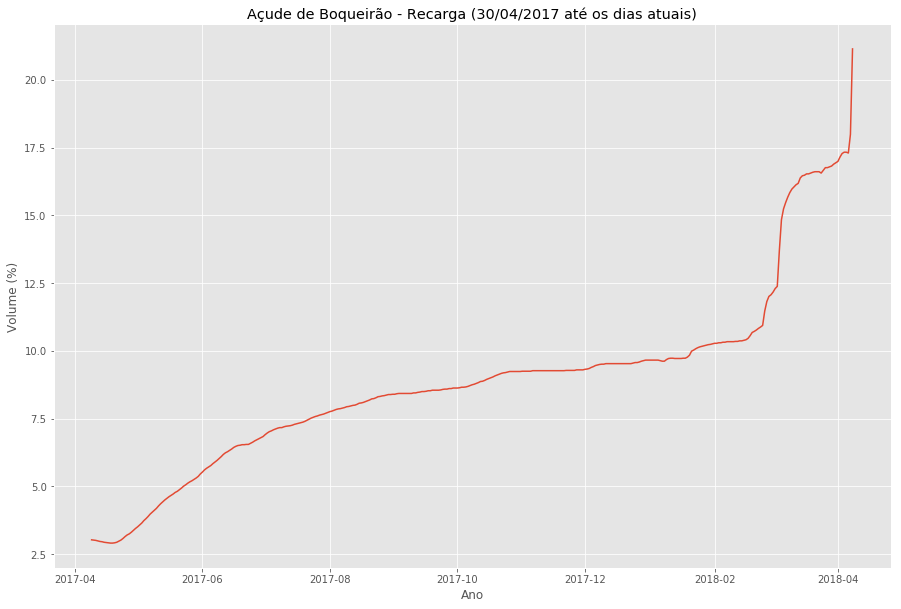

In [45]:
import matplotlib, matplotlib.pyplot as plt

matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))
plt.plot(df2["Volume (%)"])
# adcionando textos
plt.title("Açude de Boqueirão - Recarga (30/04/2017 até os dias atuais)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
plt.savefig("Boqueirao-recarga-01.pdf")

plt.show()

In [46]:
# criar uma coluna com os dias
df3 = df2
numero_de_dias_observados = len(df3)
df3["dia"] = range(1,numero_de_dias_observados+1)
df3.head()

,Volume (%),Volume (m³),Aporte (m²),dia
Data do registro,,,,
2017-04-09,3.03,12475341.58,-58974.26,1
2017-04-10,3.02,12445854.45,-29487.13,2
2017-04-11,3.01,12386880.19,-58974.26,3
2017-04-12,2.99,12298418.80,-88461.39,4
2017-04-13,2.97,12239444.54,-58974.26,5


In [47]:
print("numero_de_dias_observados = ",len(df3)) # numero de tuplas ou linhas ou medições

numero_de_dias_observados =  364


In [48]:
df3.tail()

,Volume (%),Volume (m³),Aporte (m²),dia
Data do registro,,,,
2018-04-04,17.33,71332888.00,210499.20,360
2018-04-05,17.33,71332888.00,0.00,361
2018-04-06,17.30,71227638.40,-105249.60,362
2018-04-07,17.99,74069377.60,2841739.20,363
2018-04-08,21.14,87044871.44,12975493.84,364


In [49]:
# Preparar os dados para aplicar o modelo de regressao
import numpy, pandas as pd
import matplotlib, matplotlib.pyplot as plt
import sklearn.linear_model as lm
import warnings
warnings.filterwarnings('ignore')

df3.head()

,Volume (%),Volume (m³),Aporte (m²),dia
Data do registro,,,,
2017-04-09,3.03,12475341.58,-58974.26,1
2017-04-10,3.02,12445854.45,-29487.13,2
2017-04-11,3.01,12386880.19,-58974.26,3
2017-04-12,2.99,12298418.80,-88461.39,4
2017-04-13,2.97,12239444.54,-58974.26,5


In [50]:
# Aplicar o modelo de Regressao
olm = lm.LinearRegression()
#X = numpy.array([x.toordinal() for x in df3.index])[:, numpy.newaxis]
X = df3['dia'].values.reshape(-1, 1)
y = df3['Volume (%)']
olm.fit(X, y)

# Predict values
#yp = [olm.predict(x.toordinal())[0] for x in df3.index]
yp = olm.predict(df3['dia'].values.reshape(-1, 1))

# Evaluate the model
olm_score = olm.score(X, y)
olm_score

0.8186067663027004

In [51]:
X[:3]

array([[1],
       [2],
       [3]])

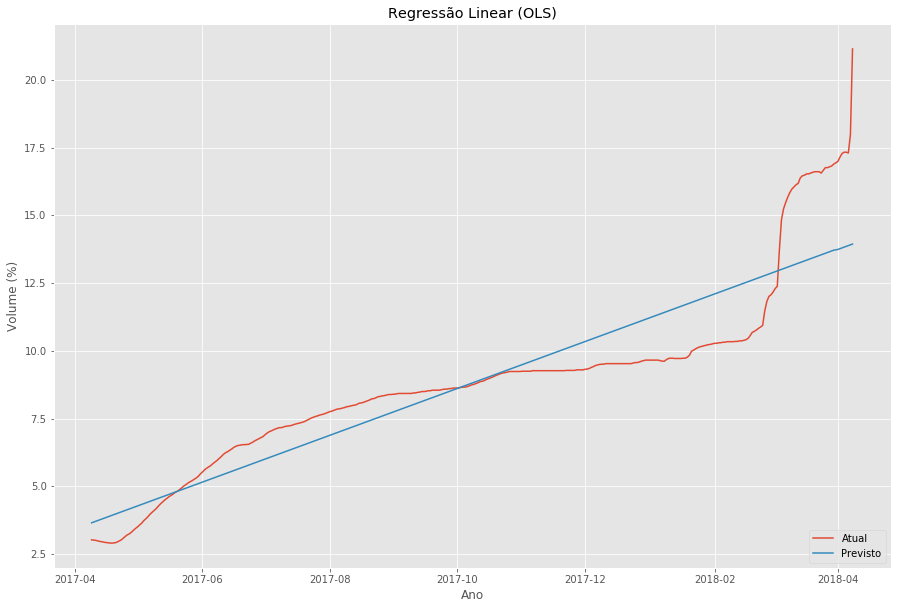

In [52]:
# Plota os dados
my_dpi=96
#plt.figure(figsize=(800/my_dpi, 600/my_dpi), dpi=my_dpi)
plt.figure( dpi=100)
%matplotlib inline
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot both data sets
plt.plot(df3.index, y)
plt.plot(df3.index, yp)

# Add decorations
plt.title("Regressão Linear (OLS)")
plt.xlabel("Ano")
plt.ylabel("Volume (%)")
plt.legend(["Atual", "Previsto"], loc="lower right")
path="/Users/vladimiralencar/Dropbox/Slides-DataScienceUEPB-2017/Praticas/python/acudes"
#plt.savefig(path + "/BoqueiraoComRecarga.pdf")
plt.show()

### preparando a saida para plotar

In [53]:
# a reta de regressao
a = olm.coef_[0]
b = olm.intercept_
print(' y = {0} * x + {1}'.format(a, b))

 y = 0.028326711893337055 * x + 3.6302102443011517


 y = 0.028326711893337055 * x + 3.6302102443011517


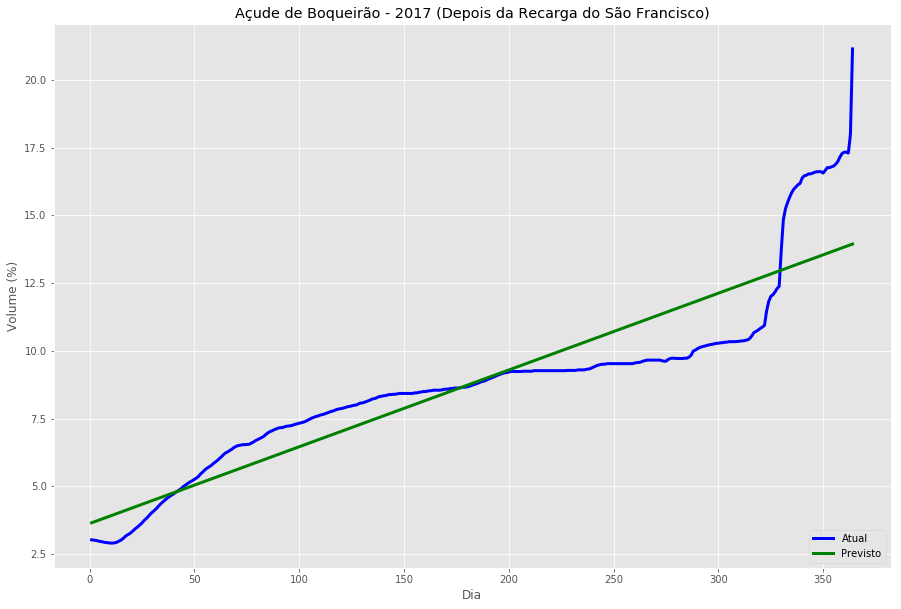

In [54]:
# Plot outputs
matplotlib.style.use("ggplot")
plt.figure(figsize=(15,10))

# Plot both data sets
#plt.scatter(X_test, Y_test,  color='black')
plt.plot(X, y, color='blue',
         linewidth=3)
plt.plot(X, olm.predict(X), color='green',
         linewidth=3)

# Add decorations
plt.title("Açude de Boqueirão - 2017 (Depois da Recarga do São Francisco)")
plt.xlabel("Dia")
plt.ylabel("Volume (%)")
plt.legend(["Atual", "Previsto",], loc="lower right")
path="/Users/vladimiralencar/Dropbox/Slides-DataScienceUEPB-2017/Praticas/python/acudes"
#plt.savefig(path + "/BoqueiraoComRecarga.pdf")
print(' y = {0} * x + {1}'.format(a, b))
plt.show()

In [55]:
list(olm.predict(X))[:3]

[3.6585369561944887, 3.6868636680878257, 3.7151903799811627]

In [56]:
import numpy as np

In [57]:
numero_de_dias_observados

364

In [62]:
dados3meses = np.array(numero_de_dias_observados + 90)
dados3meses

array(454)

In [63]:
olm.predict(dados3meses)[0]

16.490537443876175

In [65]:
# predicao para 1 ano
dados = np.array(numero_de_dias_observados + 365)
pred = olm.predict(dados)[0] 

print ("Volume Boqueirão depois de um ano = %6.2f %%" % (pred))

Volume Boqueirão depois de um ano =  24.28 %


In [66]:
# predicao para 2 anos
dados = np.array((numero_de_dias_observados+365)*2).reshape(1, -1)
pred = olm.predict(dados)[0]  

print ("Volume Boqueirão depois de dois anos = %6.2f %%" % (pred))

Volume Boqueirão depois de dois anos =  44.93 %


In [76]:
# predicao até verter água-sangrar
ano = 1
while (True):
    anopred = np.array([(numero_de_dias_observados + 365)*ano]).reshape(1, -1)
    #print(anopred/365, anopred, ano)
    pred = olm.predict(anopred)[0]  
    if pred >= 100:
        break
    print ("Volume Boqueirão depois de %d ano(s) -> %-5.2f%%" % (ano,pred))
    ano = ano +  1
print ("Volume Boqueirão depois de %d ano(s) -> %-5.2f%%" % (ano,pred))

Volume Boqueirão depois de 1 ano(s) -> 24.28%
Volume Boqueirão depois de 2 ano(s) -> 44.93%
Volume Boqueirão depois de 3 ano(s) -> 65.58%
Volume Boqueirão depois de 4 ano(s) -> 86.23%
Volume Boqueirão depois de 5 ano(s) -> 106.88%
